# Time Series Analysis

In [2]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler

from config import COUNTRIES, GEOPOINT
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import pandas as pd
from pathlib import Path

In [7]:
DATA_PATH = Path("../") / 'whales.csv'
dataframe = pd.read_csv(DATA_PATH, parse_dates=['date']).set_index('date')

## Definitions

In [4]:
colors = ['red', 'blue', 'green', 'orange', 'hotpink']
pos = [GEOPOINT[c] for c in COUNTRIES]
name = COUNTRIES
x = [x for x, y in pos]
y = [y for x, y in pos]

## Processing

In [8]:
scaler = StandardScaler()
# dataframe = dataframe.pct_change().drop(dataframe.index[0]).interpolate().dropna(axis=0)
dataframe[dataframe.columns] = scaler.fit_transform(dataframe)
dataframe = dataframe.ewm(span = 20).mean()

<Axes: xlabel='date'>

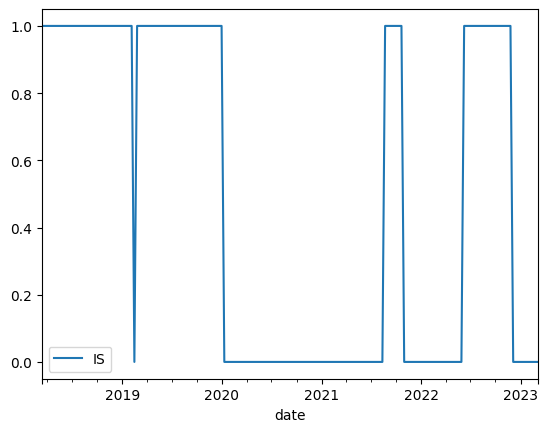

In [47]:
(dataframe.groupby(pd.Grouper(freq="10D")).mean() > 0).astype('int')[['IS']].plot()

<Axes: xlabel='date'>

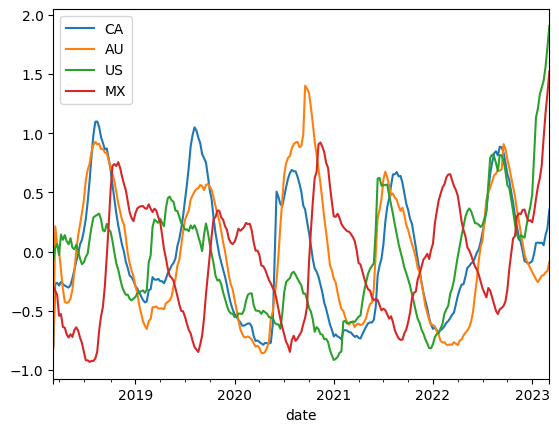

In [16]:
dataframe[['CA', 'AU', 'US', 'MX']].plot()

## Clustering

In [1]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw")
labels = km.fit_predict(dataframe.values.T / 100)

NameError: name 'TimeSeriesKMeans' is not defined

In [ ]:
# ax = plt.figure(figsize=(5,20))
# dataframe.plot(color=[colors[i] for i in labels], ax=ax)
# plt.title('Time Series clustered with DTW-KMeans')
# plt.show()

In [ ]:
cluster_df = pd.DataFrame(
    {"labels": labels, "name": name, "x": x, "y": y}
)
cluster_gdf = gpd.GeoDataFrame(
    cluster_df, geometry=gpd.points_from_xy(cluster_df.y, cluster_df.x))

In [ ]:
ax = cluster_gdf.plot('labels')
cx.add_basemap(ax=ax, crs="EPSG:4326")